# Practical Session 7 : clustering

Live selling is becoming increasingly popular in Asian countries. Small vendors can now reach a wider audience
and connect with many customers.
We try to discover diﬀerent categories of customers using clustering techniques. To this end, we shall use the
following dataset that has been obtained from UCI ML Repository :
https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

### Dataset Information


The variability of consumer engagement is analysed through a Principal Component Analysis, highlighting the changes induced by the use of Facebook Live. The seasonal component is analysed through a study of the averages of the different engagement metrics for different time-frames (hourly, daily and monthly). Finally, we identify statistical outlier posts, that are qualitatively analyzed further, in terms of their selling approach and activities.  

| Variable Name     | Role     | Type         | Description | Units | Missing Values |
|-------------------|----------|--------------|-------------|-------|----------------|
| status_id         | ID       | Integer      |             |       | no             |
| status_type       | Feature  | Categorical  |             |       | no             |
| status_published  | Feature  | Categorical  |             |       | no             |
| num_reactions     | Feature  | Integer      |             |       | no             |
| num_comments      | Feature  | Integer      |             |       | no             |
| num_shares        | Feature  | Binary       |             |       | no             |
| num_likes         | Feature  | Integer      |             |       | no             |
| num_loves         | Feature  | Binary       |             |       | no             |
| num_wows          | Feature  | Binary       |             |       | no             |
| num_hahas         | Feature  | Binary       |             |       | no             |
| num_sads          | Feature  | Binary       |             |       | no             |
| num_angrys        | Feature  | Binary       |             |       | no             |


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exercise 1: Preprocessing

### Question 1: Import the dataset

In [3]:
csv_path='/content/drive/MyDrive/STATS_UL/Lecture7/Live_20210128.csv'
df = pd.read_csv(csv_path)

### Question 2: Check shape of the dataset and preview the dataset using head()

In [4]:
df.shape

(7050, 16)

In [5]:
df.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
5,6,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
6,7,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
7,8,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
8,9,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN
9,10,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0,NaN,NaN,NaN,NaN


### Question 3: View summary of dataset using info().

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

### Question 4 :

Are there some missing values ? Remove the columns corresponding to these missing values. View a summary
of the dataset after removal

In [8]:
df.isnull()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
7046,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
7047,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
7048,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True


In [9]:
df.isnull().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [11]:
print(df.isnull().sum().sum())

28200


In [14]:
df.isnull().sum().sort_values(ascending=False)

,0
Column1,7050
Column2,7050
Column3,7050
Column4,7050
status_id,0
status_type,0
status_published,0
num_reactions,0
num_loves,0
num_likes,0


In [17]:
df['Column1'].shape[0]==df.shape[0]

True

In [18]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


### Question 5

View the statistical summary of numerical variables using the function describe()

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
status_id,7050.0,3525.500000,2035.304031,1.0,1763.25,3525.5,5287.75,7050.0
num_reactions,7050.0,230.117163,462.625309,0.0,17.00,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.00,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.00,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.00,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.00,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.00,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.00,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.00,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.00,0.0,0.00,31.0


## Exercise 2: Basic data exploration

### Question 1
We first explore the variable status id

Question 1-a : View the labels in the variable

In [21]:
df['status_id']

,status_id
0,1
1,2
2,3
3,4
4,5
...,...
7045,7046
7046,7047
7047,7048
7048,7049


Question 1-b: view how many diﬀerent types of variables are there

In [22]:
len(df['status_id'].unique())

7050

Question 1-c: What is your conclusion ? Is this variable useful for the analysis ?

We can see that there are 7050 unique labels in the status_id variable. The total number of instances in the dataset is 7050. So, it is an unique identifier for each of the instances. Thus this is not a variable that we can use. Hence, we will drop it.

### Question 2

We now explore the variable status published

Question 2-a: View the labels in the variable

In [23]:
df['status_published']

,status_published
0,4/22/2018 6:00
1,4/21/2018 22:45
2,4/21/2018 6:17
3,4/21/2018 2:29
4,4/18/2018 3:22
...,...
7045,9/24/2016 2:58
7046,9/23/2016 11:19
7047,9/21/2016 23:03
7048,9/20/2016 0:43


Question 2-b : view how many diﬀerent types of variables are there

In [24]:
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [25]:
len(df['status_published'].unique())

6913

In [26]:
df['status_published'].unique().shape

(6913,)

Question 2-c : What is your conclusion ? Is this variable useful for the analysis ?

Again, we can see that there are 6913 unique labels in the status_published variable. The total number of instances in the dataset is 7050. So, it is also a approximately a unique identifier for each of the instances. Thus this is not a variable that we can use. Hence, we will drop it also.

### Question 3:

Finally, we explore the variable status type. View the labels in the variable and view how many diﬀerent
types of variables are there. Is this variable useful for the analysis ?

In [27]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [28]:
len(df['status_type'].unique())

4

## Question 4 : Remove unuseful variables. View the summary of dataset again

In [ ]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


### Question 5:
Convert the categorical variable status type into integers. View the summary of dataset again

You can set the values that you want, for example, photo = 0, video = 1 ...


In [ ]:
#df['status_type'] = pd.factorize(df['status_type'])[0]


I choose to set 0 to the most frequent label, 1 for the second most frequent label, etc

In [30]:
#Count the frequency of each unique value
frequency = df['status_type'].value_counts()

#Sort values by frequency
sorted_values = frequency.index.tolist()

#Create a mapping from categorical values to numeric values
value_mapping = {value: idx for idx, value in enumerate(sorted_values)}

# Replace the original values in the DataFrame
df['status_type'] = df['status_type'].map(value_mapping)

In [31]:
# Display the original DataFrame and the new mapped column
df.head(3)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,1,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,0,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,1,4/21/2018 6:17,227,236,57,204,21,1,1,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   int64 
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 661.1+ KB


## Exercise 3: Clustering

Question 1:

Rescale the features using MinMaxScaler()


$$
x_{\text{scaled}} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

- the smallest value in the feature column becomes 0,
- the largest value becomes 1,
- all other values lie between 0 and 1.


In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Select only numerical features for scaling
numerical_features = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

In [35]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [36]:
df['num_reactions']

,num_reactions
0,0.112314
1,0.031847
2,0.048195
3,0.023567
4,0.045223
...,...
7045,0.018896
7046,0.003397
7047,0.000425
7048,0.074522


## Question 2:

Perform k means with two clusters

In [37]:
# Initialize KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=10)

# Perform KMeans clustering on the numerical features
df['cluster'] = kmeans.fit_predict(df[numerical_features])

In [38]:
df['cluster'].value_counts()

,count
cluster,
0,6538
1,512


## Question 3:

We shall now investigate our output model

### (i) Display the centroids

After you fit KMeans, it computes K centroids, one for each cluster.

A centroid is a vector containing the mean value of each feature for all points assigned to that cluster.

If we have:

- K = 3 clusters

- p = 8 features

Then the centroid matrix will be 3 $\times$ 8.

In [40]:
# Display centroids
centroids = kmeans.cluster_centers_
print("Centroids of the clusters:")
print(centroids)


Centroids of the clusters:
[[0.02483047 0.00932759 0.00889636 0.02254048 0.01423501 0.00215728
  0.00331136 0.00441161 0.00279261]
 [0.35566655 0.02806954 0.04734731 0.34084022 0.08499512 0.03631548
  0.01879727 0.00945925 0.01461694]]
(2, 9)


In [43]:
print(f'Centroids shape (matrrx rows and columns):{centroids.shape}')

centroids shape (matrrx rows and columns):(2, 9)


(ii) Calculate the inertia of the model


Inertia is defined as the sum of squared distances between each data point and the centroid of the cluster to which it is assigned.

$$
\text{Inertia} =
\sum_{i=1}^{n} \left\| x_i - c_{\text{cluster}(i)} \right\|^{2}
$$

Where
- $x_i$ is a data point,
- $c_{\text{cluster}(i)}$ is the centroid of the cluster to which point $x_i$ belongs.




- Lower inertia $\Rightarrow$ better clustering fit,
- Higher inertia $\Rightarrow$ worse clustering.

Inertia always decreases when the number of clusters $K$ increases.  
Therefore, inertia alone cannot determine the best choice of $K$.

This motivates the use of the elbow method, which consists of plotting inertia as a function of $K$ and selecting the value where the decrease slows down significantly.

In [41]:
# Calculate inertia
inertia = kmeans.inertia_
print("\nInertia of the model:")
print(inertia)


Inertia of the model:
99.50082638379908


cluster_centers_: This returns a 2xN array (N being the number of features).

inertia_: This attribute returns the total within-cluster sum of squares (inertia), which is a measure of how tightly the data points are grouped within each cluster. Lower inertia generally means better clustering, though it can increase with the number of clusters.

## Exercise 4:optimal number of clusters

### Question 1

Perform $k$ means for $p = 1, . . . , 10$ clusters. Calculate each time inertia. What is the best choice for the
number of clusters

For 1 clusters the inertia is equal to: 203.56912885763154
For 2 clusters the inertia is equal to: 99.50082638379908
For 3 clusters the inertia is equal to: 76.02049833449252
For 4 clusters the inertia is equal to: 61.900416308485156
For 5 clusters the inertia is equal to: 50.63685906736486
For 6 clusters the inertia is equal to: 45.1921508479974
For 7 clusters the inertia is equal to: 40.434093604569725
For 8 clusters the inertia is equal to: 40.695248621683696
For 9 clusters the inertia is equal to: 37.221366428661796
For 10 clusters the inertia is equal to: 32.09421453202129


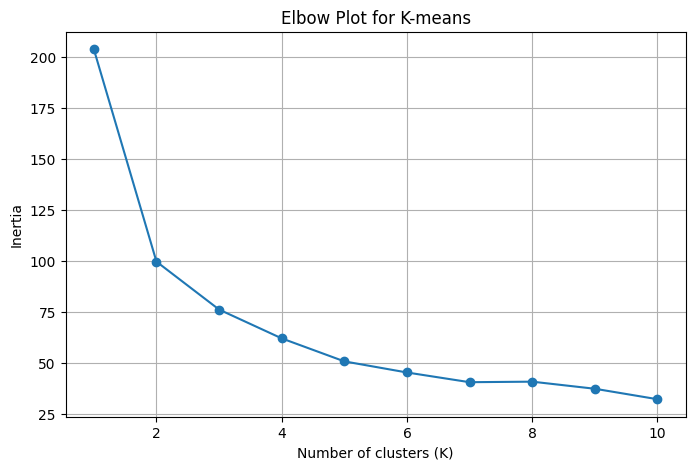

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Store inertia values
inertias = []
p = 10

for i in range(1, p+1):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(df[numerical_features])
    inertia_value = kmeans.inertia_
    inertias.append(inertia_value)
    print(f"For {i} clusters the inertia is equal to: {inertia_value}")

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(1, p+1), inertias, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Plot for K-means")
plt.grid(True)
plt.show()


K-means inertia always decreases when you increase the number of clusters.

So we want to find: The value of K where the improvement (drop in inertia) begins to slow down. This is called the elbow point.

### Question 2

We shall now evaluate the choice of number of clusters using true classes related to status type.

We shall
then set
y = df[’status type’]

how well the clusters produced by KMeans correspond to the actual categories defined in the status_type variable

In [45]:
y = df['status_type'] # True Classes

In [46]:
y

,status_type
0,1
1,0
2,1
3,0
4,0
...,...
7045,0
7046,0
7047,0
7048,0


#### (i) Perform k means with 3 clusters. Compare the true labels and predicted ones

In [47]:
# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Perform KMeans clustering on the numerical features
df['cluster'] = kmeans.fit_predict(df[numerical_features])

We reset the clusters to set the most frequent label to be 0, the second most frequent to be equal to 1...

In [58]:
frequency = df['cluster'].value_counts()
frequency

,count
cluster,
0,5378
3,1218
2,332
1,122


In [59]:
# Step 2: Sort the clusters by frequency
sorted_clusters = frequency.index.tolist()
sorted_clusters

[0, 3, 2, 1]

In [60]:
# Step 3: Create a mapping from clusters to new integer values
# The most frequent will be 0, second most frequent will be 1, etc.
value_mapping = {value: idx for idx, value in enumerate(sorted_clusters)}
value_mapping

{0: 0, 3: 1, 2: 2, 1: 3}

In [62]:
# Step 4: Replace the original cluster values in the DataFrame
df['clusterk3'] = df['cluster'].map(value_mapping)
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster,clusterk3,clusterk4
0,1,1,4/22/2018 6:00,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,3,1,1
1,2,0,4/21/2018 22:45,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0
2,3,1,4/21/2018 6:17,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0,0,0
3,4,0,4/21/2018 2:29,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0
4,5,0,4/18/2018 3:22,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0,0,0


Compute Purity and Accuracy

In [63]:
from sklearn.metrics import confusion_matrix
import numpy as np

# df['cluster'] contains cluster assignments
# df['status_type'] contains the true classes

# Create a confusion matrix
contingency_matrix = confusion_matrix(y, df['clusterk3'])
contingency_matrix

array([[3801,  286,  201,    0],
       [1270,  877,   65,  122],
       [ 258,   53,   54,    0],
       [  49,    2,   12,    0]])


COnfusion matrix is a a matrix where:

- rows = true labels (status_type): These are the real classes from status_type (0, 1, 2, 3).

- columns = K-means predicted cluster labels.

-------------

Results

- K-means does NOT recover the true classes well when K = 4.

- The model puts too many samples into cluster 0.

- Classes 1, 2, 3 are not clearly captured by any specific cluster.

- This suggests that K = 4 is not a good choice for this dataset.


In [66]:
# Calculate purity
purity = np.sum(np.amax(contingency_matrix, axis=1)) / np.sum(contingency_matrix)
print("Purity:", purity)

Purity: 0.7628368794326241


$$
\text{Purity} \;=\;
\frac{\displaystyle \sum_{\text{each true class}} \max(\text{row})}
     {\text{total number of samples}}.
$$

In [70]:
np.sum(np.amax(contingency_matrix, axis=1))

np.int64(5378)

In [71]:
np.sum(contingency_matrix)

np.int64(7050)

- Purity measures how well clusters match the true classes.

- Inside each cluster, what proportion of the samples belong to the dominant true class?

- Purity ranges from 0 to 1:

  - 1.0 = perfect clustering

  - close to 0 = very bad clustering

In [65]:
correct_predictions = (y == df['clusterk3']).sum()
# Calculate accuracy
total_predictions = df.shape[0]
accuracy = (correct_predictions / total_predictions) * 100  # Convert to percentage

# Display the accuracy
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 67.12%


np.amax(conf_matrix, axis=1) retrieves the maximum count for each cluster, which represents the number of correct predictions for that cluster.


np.sum() is used to calculate the total number of correct predictions and the total number of predictions.

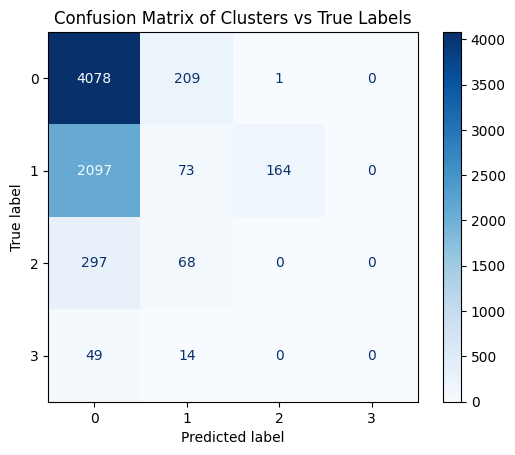

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming df contains your data with 'cluster' and 'status_type'
conf_matrix = confusion_matrix(y, df['clusterk3'])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix of Clusters vs True Labels')
plt.show()

In [72]:
df['clusterk3'].value_counts()

,count
clusterk3,
0,5378
1,1218
2,332
3,122


#### (ii) Same with 4 clusters. What is your conclusion ?

In [73]:
# Initialize KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Perform KMeans clustering on the numerical features
df['cluster'] = kmeans.fit_predict(df[numerical_features])

In [74]:
frequency = df['cluster'].value_counts()

# Step 2: Sort the clusters by frequency
sorted_clusters = frequency.index.tolist()

# Step 3: Create a mapping from clusters to new integer values
# The most frequent will be 0, second most frequent will be 1, etc.
value_mapping = {value: idx for idx, value in enumerate(sorted_clusters)}

# Step 4: Replace the original cluster values in the DataFrame
df['clusterk4'] = df['cluster'].map(value_mapping)

In [75]:
df['clusterk4'].value_counts()

,count
clusterk4,
0,5378
1,1218
2,332
3,122


In [76]:
from sklearn.metrics import confusion_matrix
import numpy as np

# df['cluster'] contains cluster assignments
# df['status_type'] contains the true classes

# Create a confusion matrix
contingency_matrix = confusion_matrix(y, df['clusterk4'])

# Calculate purity
purity = np.sum(np.amax(contingency_matrix, axis=1)) / np.sum(contingency_matrix)
print("Purity:", purity)

correct_predictions = (y == df['clusterk4']).sum()

# Calculate accuracy
total_predictions = df.shape[0]
accuracy = (correct_predictions / total_predictions) * 100  # Convert to percentage

# Display the accuracy
print(f"Accuracy: {accuracy:.2f}%")

Purity: 0.7628368794326241
Accuracy: 67.12%


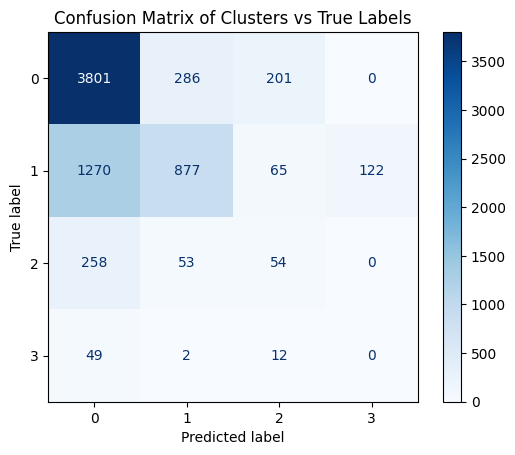

In [77]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming df contains your data with 'cluster' and 'status_type'
conf_matrix = confusion_matrix(y, df['clusterk4'])

# Display the confusion matrix
#disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
#                              display_labels=df['new_cluster'].unique())

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix of Clusters vs True Labels')
plt.show()

Higher purity and smaller accuracy for n = 3 than n = 4:

We have a very small cluster for n=4 that do not represent any status_type, this dilutes purity.

Sparsity of the data: we have a very small cluster that was not captured, even increasing to n = 4.

Purity Calculation: Purity is calculated as the fraction of the most common class in each cluster. With 3 clusters, we have clearer dominant classes, while with 4 clusters, the distribution is more mixed, leading to lower maximum counts for the dominant classes in each cluster.

